In [1]:
import pandas as pd

Files 
--

In [2]:
files = pd.read_excel("Adnimate.xlsx", sheet_name = "Files")

files.head()

,file_id,user_id,created_at,exported_at,paid_at
0,1,3,2022-09-08,2022-09-27,2022-10-07
1,2,2,2022-09-15,NaN,NaN
2,3,5,2022-09-15,2022-09-26,2022-10-03
3,4,1,2022-09-17,NaN,NaN
4,5,9,2022-09-20,2022-09-27,2022-09-30


In [3]:
files["file_created"] = files['created_at'].notna()
files["file_exported"] = files['exported_at'].notna()
files['file_paid'] = files['paid_at'].notna()

files_funnel = files.loc[:,['file_created','file_exported','file_paid']].sum()
files_funnel

file_created     12001
file_exported     6694
file_paid         6156
dtype: int64

In [4]:
files_by_user = files.groupby("user_id")[['file_created','file_exported','file_paid']].any()
files_by_user.head()

,file_created,file_exported,file_paid
user_id,,,
1,True,True,True
2,True,False,False
3,True,True,True
5,True,True,True
6,True,False,False


User table
---

In [5]:
users = pd.read_excel("Adnimate.xlsx", sheet_name = "Users")
users.head()

,user_id,first_name,last_name,company_id,role,email,password,registered
0,1,Nancy,Maas,42,Marketing Associate,nmmaas@plussunin.com,f5895664d6ff91973dd29ba307f434d3,2022-09-05
1,2,Kevin,Aguilera,73,Senior Marketing Animator,aguilera@newex.com,ce83a52800dc1599f1f7e4044cee7f86,2022-09-06
2,3,Helen,Hertz,49,Video Marketer,h-hhertz@ganjaflex.com,bfed5476095fcd908f5cdd09d11ff549,2022-09-07
3,4,Jared,Page,53,Marketing Animator,jared-page@domzoom.com,49d468eef7a1deb6a3fa755a935a43db,2022-09-07
4,5,Charlie,Madsen,20,Marketing Animator,charlie.mads@mathtouch.com,1e79ca036063445a5db3883b91cc846d,2022-09-08


In [6]:
users["user_registered"] = users["registered"].notna()

In [7]:
users = pd.merge(users, 
                files_by_user,
                how = 'left',
                on = 'user_id')
users.head()

,user_id,first_name,last_name,company_id,role,email,password,registered,user_registered,file_created,file_exported,file_paid
0,1,Nancy,Maas,42,Marketing Associate,nmmaas@plussunin.com,f5895664d6ff91973dd29ba307f434d3,2022-09-05,True,True,True,True
1,2,Kevin,Aguilera,73,Senior Marketing Animator,aguilera@newex.com,ce83a52800dc1599f1f7e4044cee7f86,2022-09-06,True,True,False,False
2,3,Helen,Hertz,49,Video Marketer,h-hhertz@ganjaflex.com,bfed5476095fcd908f5cdd09d11ff549,2022-09-07,True,True,True,True
3,4,Jared,Page,53,Marketing Animator,jared-page@domzoom.com,49d468eef7a1deb6a3fa755a935a43db,2022-09-07,True,NaN,NaN,NaN
4,5,Charlie,Madsen,20,Marketing Animator,charlie.mads@mathtouch.com,1e79ca036063445a5db3883b91cc846d,2022-09-08,True,True,True,True


In [8]:
users[["file_created", "file_exported","file_paid" ]] = users[["file_created", "file_exported","file_paid" ]].fillna(False)

In [9]:
user_funnel = users.loc[:,["user_registered", "file_created", "file_exported","file_paid"]].sum()
user_funnel

user_registered    1436
file_created       1082
file_exported       785
file_paid           752
dtype: int64

In [10]:
users.head()

,user_id,first_name,last_name,company_id,role,email,password,registered,user_registered,file_created,file_exported,file_paid
0,1,Nancy,Maas,42,Marketing Associate,nmmaas@plussunin.com,f5895664d6ff91973dd29ba307f434d3,2022-09-05,True,True,True,True
1,2,Kevin,Aguilera,73,Senior Marketing Animator,aguilera@newex.com,ce83a52800dc1599f1f7e4044cee7f86,2022-09-06,True,True,False,False
2,3,Helen,Hertz,49,Video Marketer,h-hhertz@ganjaflex.com,bfed5476095fcd908f5cdd09d11ff549,2022-09-07,True,True,True,True
3,4,Jared,Page,53,Marketing Animator,jared-page@domzoom.com,49d468eef7a1deb6a3fa755a935a43db,2022-09-07,True,False,False,False
4,5,Charlie,Madsen,20,Marketing Animator,charlie.mads@mathtouch.com,1e79ca036063445a5db3883b91cc846d,2022-09-08,True,True,True,True


In [11]:
user_funnel_by_role = users.groupby("role")[["user_registered", "file_created", "file_exported","file_paid"]].sum().T

In [12]:
users_by_company = users.groupby("company_id")[["user_registered", "file_created", "file_exported","file_paid"]].any()
users_by_company.head()

,user_registered,file_created,file_exported,file_paid
company_id,,,,
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
5,True,True,True,True
6,True,True,True,True


Companies
===

In [13]:
companies = pd.read_excel("Adnimate.xlsx", sheet_name = "Companies")
companies.head()

,company_id,company_name,company_type,company_email,registered
0,1,Kinnamplus,Unknown,marketing@kinnamplus.com,2022-07-05
1,2,Green-Plus,Pharmacy,sales@green-plus.com,2022-07-21
2,3,Zotware,Tech,zotware@zotware.com,2022-07-26
3,4,Doncon,Tech,doncon@doncon.com,2022-07-31
4,5,Xx-holding,Real Estate,sales@xx-holding.com,2022-07-31


In [14]:
companies["company_registered"] = companies['registered'].notna()

In [15]:
companies = pd.merge(companies,
        users_by_company,
        how = "left",
        on = "company_id")
companies.head()

,company_id,company_name,company_type,company_email,registered,company_registered,user_registered,file_created,file_exported,file_paid
0,1,Kinnamplus,Unknown,marketing@kinnamplus.com,2022-07-05,True,True,True,True,True
1,2,Green-Plus,Pharmacy,sales@green-plus.com,2022-07-21,True,True,True,True,True
2,3,Zotware,Tech,zotware@zotware.com,2022-07-26,True,True,True,True,True
3,4,Doncon,Tech,doncon@doncon.com,2022-07-31,True,NaN,NaN,NaN,NaN
4,5,Xx-holding,Real Estate,sales@xx-holding.com,2022-07-31,True,True,True,True,True


In [19]:
companies[['user_registered','file_created', 'file_exported','file_paid']] = companies[['user_registered','file_created', 'file_exported','file_paid']].fillna(False)

In [20]:
companies_funnel = companies.loc[:,["company_registered", 'user_registered', "file_created", "file_exported","file_paid"]].sum()

In [21]:
companies.head()

,company_id,company_name,company_type,company_email,registered,company_registered,user_registered,file_created,file_exported,file_paid
0,1,Kinnamplus,Unknown,marketing@kinnamplus.com,2022-07-05,True,True,True,True,True
1,2,Green-Plus,Pharmacy,sales@green-plus.com,2022-07-21,True,True,True,True,True
2,3,Zotware,Tech,zotware@zotware.com,2022-07-26,True,True,True,True,True
3,4,Doncon,Tech,doncon@doncon.com,2022-07-31,True,False,False,False,False
4,5,Xx-holding,Real Estate,sales@xx-holding.com,2022-07-31,True,True,True,True,True


In [22]:
company_funnel_by_type = companies.groupby('company_type')[["company_registered", 'user_registered', "file_created", "file_exported","file_paid"]].sum().T

In [23]:
company_funnel_by_type

company_type,Education,Media,Pharmacy,Real Estate,Tech,Textile,Unknown
company_registered,6,12,10,8,20,5,14
user_registered,6,11,10,8,19,4,14
file_created,6,11,10,8,19,4,13
file_exported,6,11,9,8,18,4,9
file_paid,6,11,9,8,18,4,9


Leads
===

In [24]:
leads = pd.read_excel("Adnimate.xlsx", sheet_name = "Leads")
leads["lead_created"] = True
leads['lead_contacted'] = leads["Contacted At"].notna()
leads['lead_replied'] = leads['Replied At'].notna()

leads_funnel = leads.loc[:,['lead_created','lead_contacted','lead_replied']].sum()
leads_funnel.head()

lead_created      311
lead_contacted    301
lead_replied      173
dtype: int64

In [25]:
leads_funnel_by_role = leads.groupby("Contact Role")[['lead_created','lead_contacted','lead_replied']].sum().T
leads_funnel_by_role

Contact Role,CEO,CTO,Head Of Marketing,Head Of Sales,Marketing Associate,Marketing Director,Marketing Solutions,Marketing Videographer,Partner,Sales Director,Senior Marketing Associate,Software Acquisition
lead_created,33,3,54,16,58,25,14,42,1,2,27,36
lead_contacted,29,3,54,16,58,25,14,42,0,2,27,31
lead_replied,18,1,34,8,34,16,5,23,0,2,14,18


In [26]:
leads.head()

,Company Name,Contact Name,Contact Role,Contact Email,Lead Impact,Contacted At,Replied At,lead_created,lead_contacted,lead_replied
0,Zotware,Jason Sheppard,Marketing Solutions,jsheppard@zotware.com,small,2022-06-08,2022-07-02,True,True,True
1,Vandervort PLC,Tracy Smith,Head Of Marketing,tracys@vandervortplc.com,normal,2022-06-08,2022-07-02,True,True,True
2,Kinnamplus,Richard Thomasson,Head Of Marketing,ritthomasson@kinnamplus.com,small,2022-06-11,2022-07-05,True,True,True
3,Douglas-Pfeffer,Logan Parker,Head Of Marketing,pparker@douglas-pfeffer.com,small,2022-06-12,2022-07-06,True,True,True
4,Doncon,Michele Simpson,CEO,micsimpson@doncon.com,small,2022-06-14,2022-07-08,True,True,True


In [29]:
leads['Lead Impact'].unique() -> 0,1,2

array(['small', 'normal', 'high'], dtype=object)

In [30]:
leads_by_company = leads.groupby("Company Name", as_index=False).agg({"Lead Impact": "min",
                                                                     "lead_created":"any",
                                                                     "lead_contacted": "any",
                                                                     "lead_replied": "any"})

In [31]:
leads_by_company

,Company Name,Lead Impact,lead_created,lead_contacted,lead_replied
0,Abbott and Sons,normal,True,True,True
1,"Adams, Rempel and Lakin",small,True,True,False
2,"Aufderhar, Schuppe and Gutmann",normal,True,True,False
3,Bailey-Nikolaus,high,True,True,False
4,Bailey-O'Kon,small,True,True,True
...,...,...,...,...,...
268,Zoomit,small,True,True,True
269,Zotware,small,True,True,True
270,Zumgoity,small,True,True,True
271,dambase,small,True,True,True


In [32]:
companies_short = companies[['company_name', 'company_id', 'company_type','company_registered',
                            'user_registered', 'file_created', 'file_exported', 'file_paid']]
companies_short.head()

,company_name,company_id,company_type,company_registered,user_registered,file_created,file_exported,file_paid
0,Kinnamplus,1,Unknown,True,True,True,True,True
1,Green-Plus,2,Pharmacy,True,True,True,True,True
2,Zotware,3,Tech,True,True,True,True,True
3,Doncon,4,Tech,True,False,False,False,False
4,Xx-holding,5,Real Estate,True,True,True,True,True


In [33]:
full_base = pd.merge(leads_by_company,companies_short,how="left",left_on="Company Name",right_on="company_name")
full_base

,Company Name,Lead Impact,lead_created,lead_contacted,lead_replied,company_name,company_id,company_type,company_registered,user_registered,file_created,file_exported,file_paid
0,Abbott and Sons,normal,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Adams, Rempel and Lakin",small,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Aufderhar, Schuppe and Gutmann",normal,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bailey-Nikolaus,high,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bailey-O'Kon,small,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Zoomit,small,True,True,True,Zoomit,34.0,Media,True,True,True,True,True
269,Zotware,small,True,True,True,Zotware,3.0,Tech,True,True,True,True,True
270,Zumgoity,small,True,True,True,Zumgoity,16.0,Tech,True,True,True,True,True
271,dambase,small,True,True,True,dambase,35.0,Media,True,True,True,True,True


In [34]:
full_base = full_base[['Company Name','Lead Impact','company_type',
                       'lead_created', 'lead_contacted','lead_replied','company_registered',
                       'user_registered', 'file_created', 'file_exported', 'file_paid']]

In [35]:
full_base.rename(columns = {'Company Name': 'company_name',
                           'Lead Impact': 'lead_impact'},
                inplace=True)

/var/folders/2w/zv9tyjqd4n1cxm711skjgh9c0000gn/T/ipykernel_35199/846564104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_base.rename(columns = {'Company Name': 'company_name',


In [36]:
full_base[['company_registered',
                       'user_registered', 'file_created', 'file_exported', 'file_paid']]=full_base[['company_registered',
                       'user_registered', 'file_created', 'file_exported', 'file_paid']].fillna(False)

/var/folders/2w/zv9tyjqd4n1cxm711skjgh9c0000gn/T/ipykernel_35199/3078707003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_base[['company_registered',


In [37]:
full_base['company_type'] = full_base['company_type'].fillna("Unknown")

/var/folders/2w/zv9tyjqd4n1cxm711skjgh9c0000gn/T/ipykernel_35199/886329055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_base['company_type'] = full_base['company_type'].fillna("Unknown")


In [38]:
full_base.head()

,company_name,lead_impact,company_type,lead_created,lead_contacted,lead_replied,company_registered,user_registered,file_created,file_exported,file_paid
0,Abbott and Sons,normal,Unknown,True,True,True,False,False,False,False,False
1,"Adams, Rempel and Lakin",small,Unknown,True,True,False,False,False,False,False,False
2,"Aufderhar, Schuppe and Gutmann",normal,Unknown,True,True,False,False,False,False,False,False
3,Bailey-Nikolaus,high,Unknown,True,True,False,False,False,False,False,False
4,Bailey-O'Kon,small,Unknown,True,True,True,False,False,False,False,False


In [39]:
full_funnel = full_base.iloc[:, 3:].sum().T

In [40]:
full_funnel

lead_created          273
lead_contacted        264
lead_replied          150
company_registered     75
user_registered        72
file_created           71
file_exported          65
file_paid              65
dtype: int64

In [44]:
import plotly.express as px

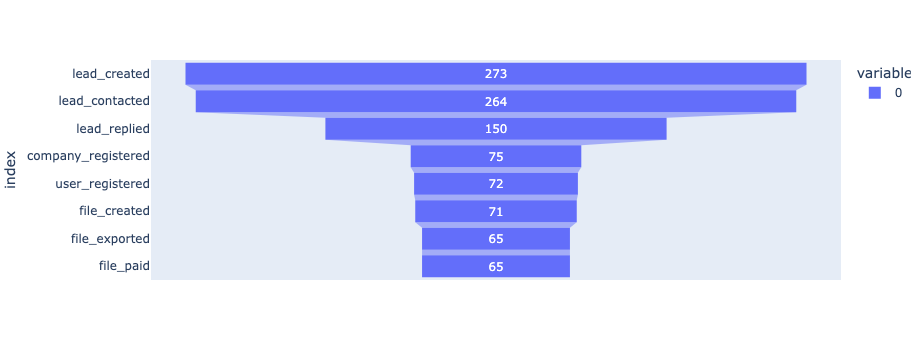

In [45]:
px.funnel(full_funnel)

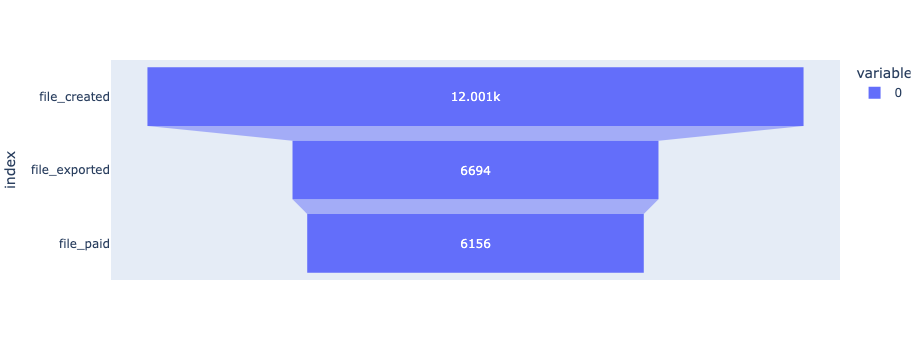

In [46]:
px.funnel(files_funnel)

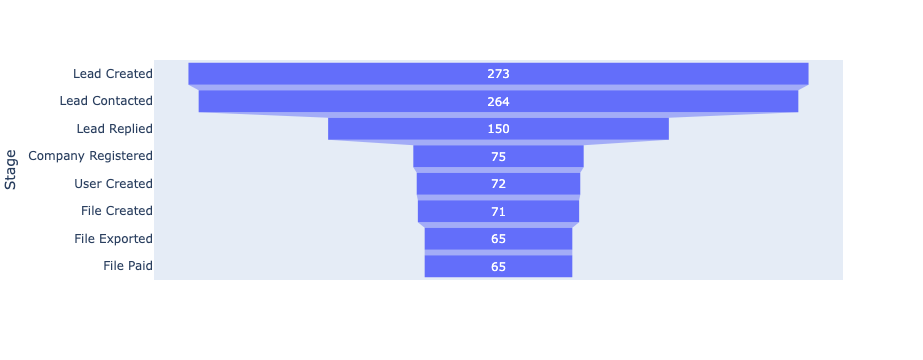

In [48]:
data = {'values': full_funnel,
       'Stage': ['Lead Created', 'Lead Contacted', 'Lead Replied', 'Company Registered',
       'User Created', 'File Created', 'File Exported', 'File Paid']}
px.funnel(data ,
          x = 'values',
         y = 'Stage')

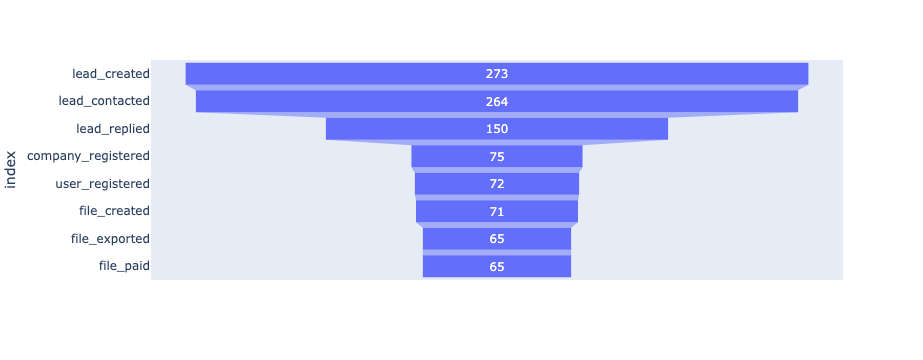

In [51]:
company_funnel_by_type

company_type,Education,Media,Pharmacy,Real Estate,Tech,Textile,Unknown
company_registered,6,12,10,8,20,5,14
user_registered,6,11,10,8,19,4,14
file_created,6,11,10,8,19,4,13
file_exported,6,11,9,8,18,4,9
file_paid,6,11,9,8,18,4,9


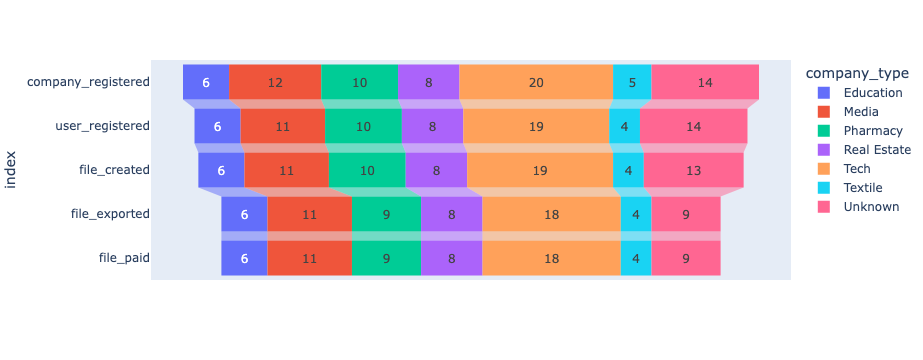

In [50]:
px.funnel(company_funnel_by_type)

In [52]:
from plotly.graph_objects import *

lead_created          273
lead_contacted        264
lead_replied          150
company_registered     75
user_registered        72
file_created           71
file_exported          65
file_paid              65
dtype: int64

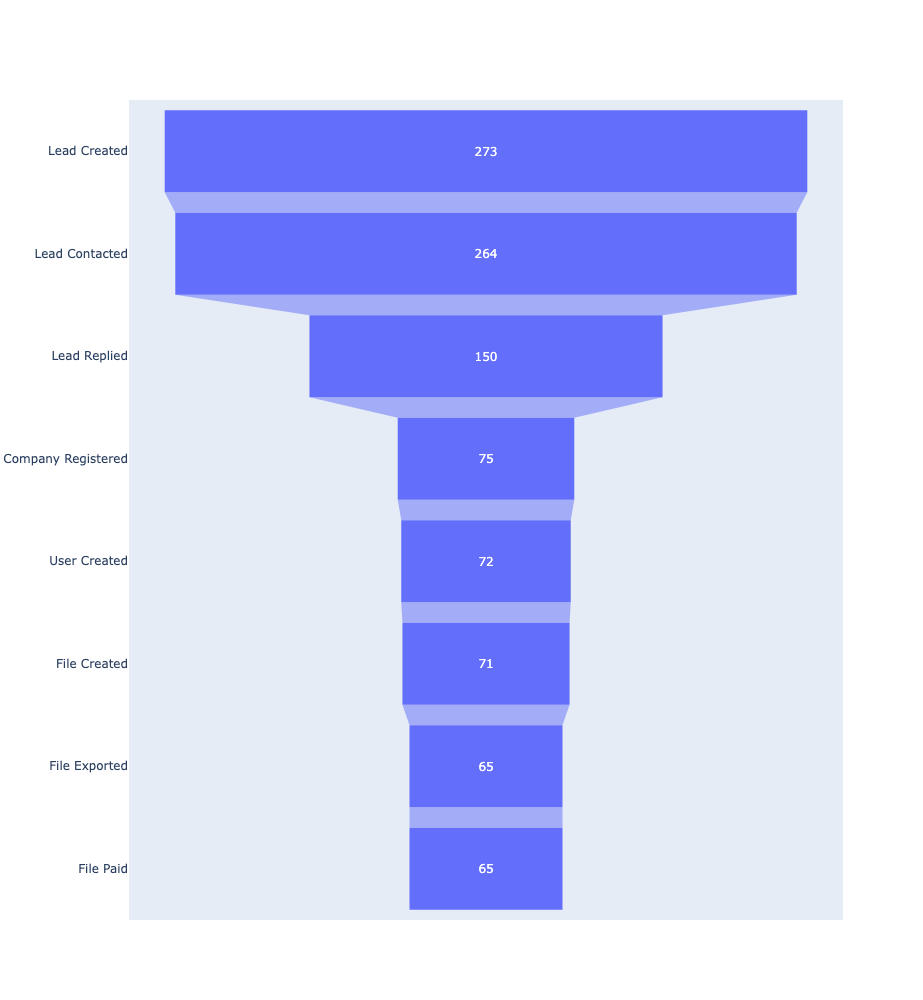

In [55]:
display(full_funnel)
funnel_object = Funnel(x = full_funnel,
                      y = ['Lead Created', 'Lead Contacted', 'Lead Replied', 'Company Registered',
       'User Created', 'File Created', 'File Exported', 'File Paid'])
fig = Figure(data = funnel_object,
            layout = Layout(width = 1000,
                           height = 1000))
fig.show()

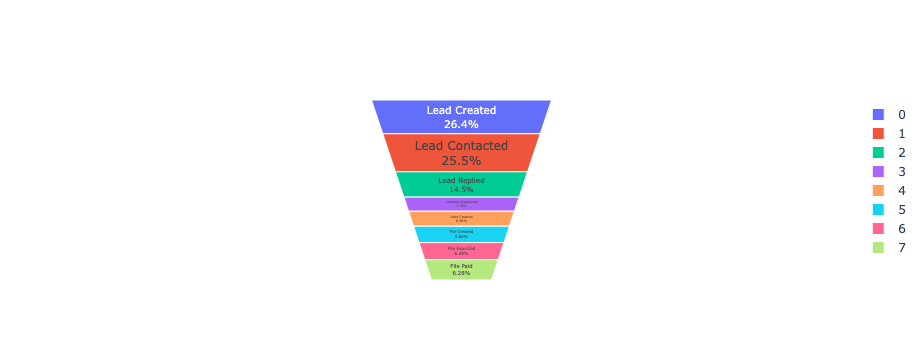

In [56]:
fig = Figure(data = Funnelarea(values = full_funnel,
                              text = ['Lead Created', 'Lead Contacted', 'Lead Replied', 'Company Registered',
       'User Created', 'File Created', 'File Exported', 'File Paid']))
fig.show()